In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import keras
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional

In [2]:
filename = ['L4_abhay_M_38_10.txt','L4_abhilash1_M_23_10.txt','L4_amrish_M_29_10.txt','L4_annu1_F_10_10.txt','L4_anuj1_M_13_10.txt','L4_avinash1_M_27_10.txt','L4_bhuvan1_M_13_10.txt','L4_chachiiiiiiiiiii1_F_35_10.txt','L4_champu_M_21_10.txt','L4_garima1_F_13_10.txt','L4_geetamami1_F_34_10.txt','L4_gordhan_M_45_10.txt','L4_Gunjan1_F_17_10.txt','L4_guzzrAunty1_F_48_10.txt','L4_joney1_M_31_10.txt','L4_kanchan1_F_12_10.txt','L4_kapil_M_21_10.txt','L4_kirti1_F_6_10.txt','L4_kusum1_F_48_10.txt','L4_lalit1_M_12_10.txt','L4_laras1_M_8_10.txt','L4_mahesh1_M_50_10.txt','L4_mannu1_M_13_10.txt','L4_manthan1_M_18_10.txt','L4_mohit1_M_10_10.txt','L4_monika1_F_24_10.txt','L4_moolchnd1_M_47_10.txt','L4_munish_M_42_10.txt','L4_nanaji1_M_63_10.txt','L4_naveen1_M_15_10.txt','L4_neeraj_M_28_10.txt','L4_nirmal_M_49_10.txt','L4_nishu1_M_12_10.txt','L4_omsingh_M_35_10.txt','L4_pawan1_M_23_10.txt','L4_prabhat1_M_25_10.txt','L4_prachi1_F_8_10.txt','L4_praveen1_M_28_10.txt','L4_priya1_F_7_10.txt','L4_pushpa1_F_37_10.txt','L4_radhe1_M_36_10.txt','L4_rajumama1_M_36_10.txt','L4_raj_M_28_10.txt','L4_ranu_M_22_10.txt','L4_rohit1_M_16_10.txt','L4_sachinn_M_38_10.txt','L4_sakshi1_F_19_10.txt','L4_santosh1_F_53_10.txt','L4_shelly_F_17_10.txt','L4_soniya1_F_25_10.txt','L4_sumit1_M_12_10.txt','L4_sunil_M_27_10.txt','L4_sunyana1_F_15_10.txt','L4_sushma1_F_18_10.txt','L4_swati1_F_13_10.txt','L4_tarun1_M_18_10.txt','L4_umesh1_M_20_10.txt','L4_vikas1_M_33_10.txt','L4_vinay1_M_11_10.txt','L4_yogesh_M_28_10.txt']
len(filename)

60

In [12]:
df=pd.read_csv('all.csv',header=None)
# df = df.drop(df.columns[[16, 17]], axis=1)  # df.columns is zero-based pd.Index
df.shape
# dataframes=pd.read_table('L4_abhay_M_38_10.txt',' ',header=None)
# dataframes[14] = 5
# dataframes.insert(0,'0','_abhay_M_38_')
# for i in range(1,60):
#     for j in range(2,5):
# #         for k in range(1,4):
#         k = 1
#         ff = filename[i]
#         fr = ff[2:]
#         ft = "L"+str(j)+fr
#         ww = ff[::-1]
#         id = ww.find("_")
#         idx = len(ww)-id
#         wq = ft[:idx]
#         fn = wq+str(k)+".txt"
#         fn.strip()
# #             print(fn)
# #             print(len(fn))
# #             fn = filename[i]
#         tttt = 0
#         pppp = fn.find('M')
#         if pppp==-1:
#             pppp = fn.find('F')
#         hhhhh = fn[(pppp+2):]
#         xyz = hhhhh.find('_')
#         hhhhhh = fn[(xyz+1):]
#         abc = hhhhhh.find('_')
#         agestr = fn[(2+pppp):(xyz+pppp+2)]
#         df=pd.read_table(fn,' ',header=None)
#         df.insert(0,'0',wq[2:])
        
#         y = int(agestr)
# #         print(y)
#         if y<=10:
#             df[14]=1
#         elif y<=15:
#             df[14]=2
#         elif y<=23:
#             df[14]=3
#         elif y<=29:
#             df[14]=4
#         elif y<=38:
#             df[14]=5
#         else:
#             df[14]=6
# #         p = fn.find('M')
# #         if p!=-1:
# #             df[14] = 'M'
# #         else:
# #             df[14] = 'F'
            
#         dataframes = dataframes.append(df)
# # df=pd.read_table('L4_yogesh_M_28_10.txt',' ',header=None)
# # df.shape
# print(dataframes.shape)
# dataframes.head(500)
# # rawdata = pd.Series(dataframes)
# # rawdata.shape

(94810, 16)

In [13]:
data=np.array(df)
print(data)

[['L1_abhay_M_38_1.txt' 2.3714 80.95 ... -10.859 -0.1315 'M']
 ['L1_abhay_M_38_1.txt' 2.5153 83.811 ... -11.373 -0.19861 'M']
 ['L1_abhay_M_38_1.txt' 2.6574 86.567 ... -11.861 -0.2631 'M']
 ...
 ['L1_prachi1_F_8_7.txt' 40.856 39.876 ... 70.582 47.986 'F']
 ['L1_prachi1_F_8_7.txt' 37.517 37.031 ... 64.252 46.28 'F']
 ['L1_prachi1_F_8_7.txt' 33.764 33.802 ... 57.342 44.185 nan]]


In [14]:
# pick a large window size of 25 cycles
sequence_length = 50

# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    
    data_matrix = id_df[:,seq_cols]
    
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [36]:
sequence_cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

seq_gen = (list(gen_sequence(data[data[0:,0]==id], sequence_length, sequence_cols)) 
          for id in np.unique(data[0:,0]))

seq_array = np.concatenate(list(seq_gen))
print(seq_array.shape)
seq_array

(76410, 50, 15)


array([[[242.96, 615.14, 410.71, ..., 572.63, 418.78, 'F'],
        [253.1, 638.1, 428.09, ..., 593.28, 432.79, 'F'],
        [261.8, 657.5, 443.29, ..., 610.52, 444.24, 'F'],
        ...,
        [-82.405, -208.42, -146.71, ..., -252.05, -179.68, 'F'],
        [-87.993, -218.82, -161.76, ..., -260.44, -182.45, 'F'],
        [-93.691, -229.43, -176.99, ..., -268.81, -185.19, 'F']],

       [[253.1, 638.1, 428.09, ..., 593.28, 432.79, 'F'],
        [261.8, 657.5, 443.29, ..., 610.52, 444.24, 'F'],
        [268.98, 673.14, 456.19, ..., 624.14, 452.98, 'F'],
        ...,
        [-87.993, -218.82, -161.76, ..., -260.44, -182.45, 'F'],
        [-93.691, -229.43, -176.99, ..., -268.81, -185.19, 'F'],
        [-99.406, -240.04, -192.22, ..., -276.96, -187.78, 'F']],

       [[261.8, 657.5, 443.29, ..., 610.52, 444.24, 'F'],
        [268.98, 673.14, 456.19, ..., 624.14, 452.98, 'F'],
        [274.59, 684.92, 466.71, ..., 634.07, 458.96, 'F'],
        ...,
        [-93.691, -229.43, -176.99, .

In [37]:
seq_array = shuffle(seq_array)

In [38]:
train_final=seq_array[0:60000,:,0:14]
test_final=seq_array[60000:,:,0:14]
from sklearn import preprocessing
train_label=seq_array[0:60000,0,14]
test_label=seq_array[60000:,0,14]
lb = preprocessing.LabelBinarizer()
train_label=lb.fit_transform(train_label)
test_label=lb.fit_transform(test_label)
train_label=train_label.reshape((train_label.shape[0],1))
train_label=train_label.astype('int')
test_label=test_label.astype('int')
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)


(60000, 50, 14)
(60000, 1)
(16410, 50, 14)
(16410, 1)


In [28]:
# from sklearn.utils import shuffle
# train_final,train_label = shuffle(train_final,train_label)

In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:

# nb_features = train_final.shape[2]
# nb_out = train_label.shape[1]

# model = Sequential()

# model.add(Bidirectional(LSTM( units=256,
#          return_sequences=True),
#          input_shape=(sequence_length, nb_features),
#         ))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(LSTM(
#          units=128,
#          return_sequences=True))

# model.add(BatchNormalization())
# model.add(LSTM(
#           units=64,
#           return_sequences=False))

# model.add(BatchNormalization())
# model.add(Dense(units=32))
# model.add(Dense(units=nb_out, activation='sigmoid'))
# tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())


nb_features = train_final.shape[2]
nb_out = train_label.shape[1]

model = Sequential()

model.add(Bidirectional(LSTM( units=512,
         return_sequences=True),
         input_shape=(sequence_length, nb_features),
        ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
         units=256,
         return_sequences=True))

model.add(BatchNormalization())
model.add(LSTM(
         units=128,
         return_sequences=True))

model.add(BatchNormalization())
model.add(LSTM(
          units=64,
          return_sequences=False))

model.add(BatchNormalization())
model.add(Dense(units=32))
model.add(Dense(units=nb_out, activation='sigmoid'))
tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 50, 1024)         2158592   
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 50, 1024)          0         
                                                                 
 batch_normalization_9 (Batc  (None, 50, 1024)         4096      
 hNormalization)                                                 
                                                                 
 lstm_10 (LSTM)              (None, 50, 256)           1311744   
                                                                 
 batch_normalization_10 (Bat  (None, 50, 256)          1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
train_final = np.asarray(train_final).astype(np.float32)
train_label = np.asarray(train_label).astype(np.float32)
test_final = np.asarray(test_final).astype(np.float32)
test_label = np.asarray(test_label).astype(np.float32)
model.fit(train_final,train_label,validation_split=0.2,epochs=1, batch_size=32,verbose=1)

1500/1500 [==============================] - 173s 110ms/step - loss: 0.2529 - accuracy: 0.8955 - val_loss: 0.0831 - val_accuracy: 0.9707


In [41]:
tensorflow.keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(test_final, test_label, verbose=1, batch_size=32)
scores[1]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


513/513 [==============================] - 23s 38ms/step - loss: 0.0797 - accuracy: 0.9733


0.9733089804649353

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_gender_alpha.png',bbox_inches='tight')

In [46]:
# scores_test = model.evaluate(test_final,test_label, verbose=2)
# print('Accurracy: {}'.format(scores_test[1]))

# make predictions and compute confusion matrix
# y_pred_test = np.argmax(model.predict(test_final),axis=1)
y_pred_test = np.round_(model.predict(test_final))

y_true_test = test_label



print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm_test = confusion_matrix(y_true_test, y_pred_test)
print(cm_test)

# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[ 4755   126]
 [  312 11217]]
Precision:  0.9888918275588469 
 Recall:  0.9729378090033828 
 F1-score: 0.9808499475341029


Confusion matrix, without normalization
[[ 4755   126]
 [  312 11217]]


<Figure size 432x288 with 0 Axes>

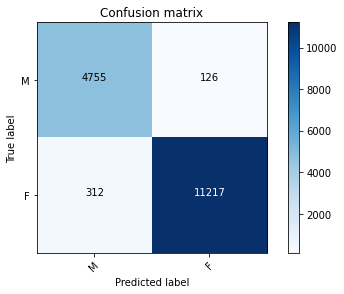

In [47]:
# Plot non-normalized confusion matrix
class_names=['M','F']
plt.figure()
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()